## Comparison between the attack using dts trained on a plain statistical generated dataset and on a statistical generated dataset filtering out the points "far" from the instance.

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier, KMostSureVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2

# Loading the Diva data

In [2]:
from utils.dataloading.diva import load_diva_data, load_diva_randomforest # type: ignore

BB = load_diva_randomforest()
BB_DATA = load_diva_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))
test_representatives_x = BB_DATA['X_attack_5_per_quantile']
test_representatives_y = BB_DATA['y_attack_5_per_quantile']
n_datasets = len(test_representatives_x)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2094
           1       0.85      0.77      0.81       745

    accuracy                           0.90      2839
   macro avg       0.89      0.86      0.87      2839
weighted avg       0.90      0.90      0.90      2839



# Hard Voting

## Plain

report full
              precision    recall  f1-score   support

          in       0.70      0.81      0.75      6382
         out       0.27      0.17      0.21      2716

    accuracy                           0.62      9098
   macro avg       0.48      0.49      0.48      9098
weighted avg       0.57      0.62      0.59      9098


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4952
         out       0.36      0.00      0.01      2159

    accuracy                           0.70      7111
   macro avg       0.53      0.50      0.41      7111
weighted avg       0.59      0.70      0.57      7111


Class 1
              precision    recall  f1-score   support

          in       0.68      0.17      0.27      1430
         out       0.27      0.80      0.41       557

    accuracy                           0.35      1987
   macro avg       0.48      0.48      0.34      1987
weighted avg       0.57      0.35      0.31 

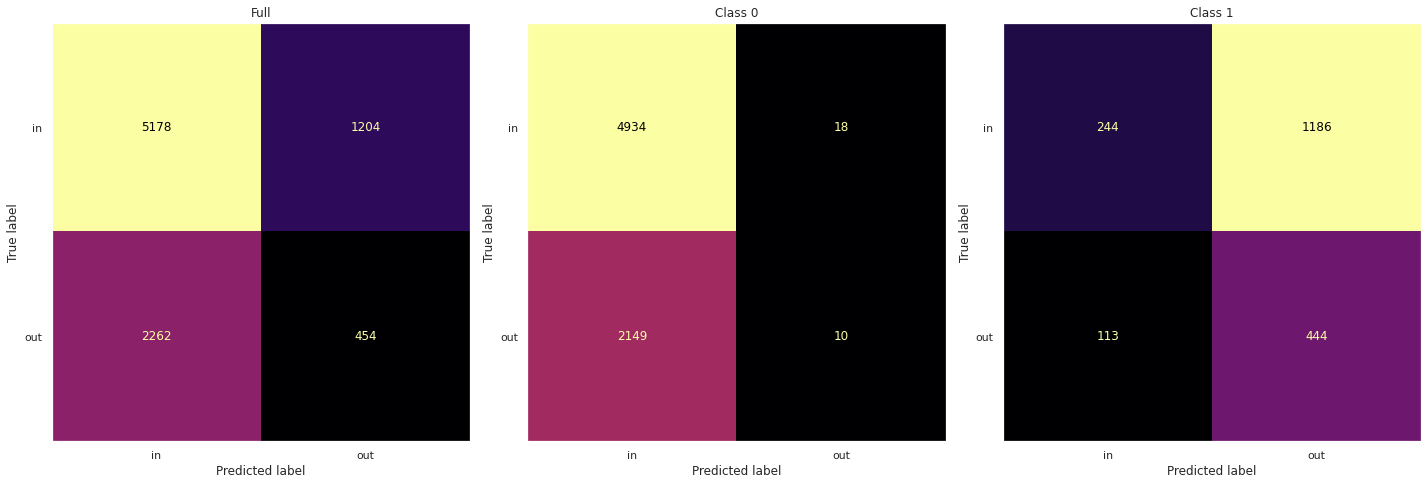

In [3]:
PLAIN_BASE_PATH = Path("../../statistical_no3std/diva/experiment_output/")
statistical_plain_0 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_plain_1 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_ens_0 = HardVotingClassifier(statistical_plain_0)
statistical_ens_1 = HardVotingClassifier(statistical_plain_1)

evaluate_attack(statistical_ens_0, statistical_ens_1, BB, BB_DATA)

## 3std

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      6575
         out       0.31      0.02      0.03      2816

    accuracy                           0.69      9391
   macro avg       0.50      0.50      0.42      9391
weighted avg       0.58      0.69      0.58      9391


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4958
         out       0.44      0.00      0.01      2160

    accuracy                           0.70      7118
   macro avg       0.57      0.50      0.41      7118
weighted avg       0.62      0.70      0.57      7118


Class 1
              precision    recall  f1-score   support

          in       0.71      0.95      0.81      1617
         out       0.29      0.05      0.09       656

    accuracy                           0.69      2273
   macro avg       0.50      0.50      0.45      2273
weighted avg       0.59      0.69      0.60 

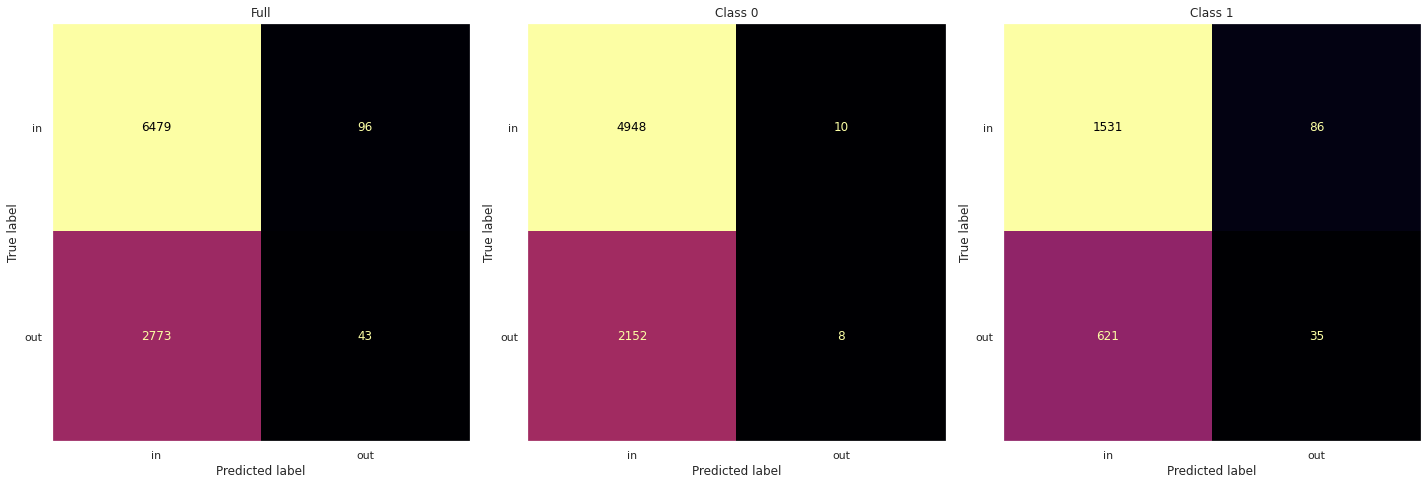

In [4]:
STD_DEV_BASE_PATH = Path("../../statistical/diva/experiment_output/")
statistical_std_dev_0 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_1 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_0 = HardVotingClassifier(statistical_std_dev_0)
statistical_std_dev_1 = HardVotingClassifier(statistical_std_dev_1)

evaluate_attack(statistical_std_dev_0, statistical_std_dev_1, BB, BB_DATA)

# Soft Voting

## Plain

report full
              precision    recall  f1-score   support

          in       0.70      0.78      0.74      6624
         out       0.28      0.20      0.24      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.49      0.49      9463
weighted avg       0.57      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      1.00      0.82      4965
         out       0.40      0.01      0.01      2165

    accuracy                           0.70      7130
   macro avg       0.55      0.50      0.42      7130
weighted avg       0.61      0.70      0.57      7130


Class 1
              precision    recall  f1-score   support

          in       0.67      0.14      0.23      1659
         out       0.28      0.83      0.42       674

    accuracy                           0.34      2333
   macro avg       0.48      0.49      0.33      2333
weighted avg       0.56      0.34      0.29 

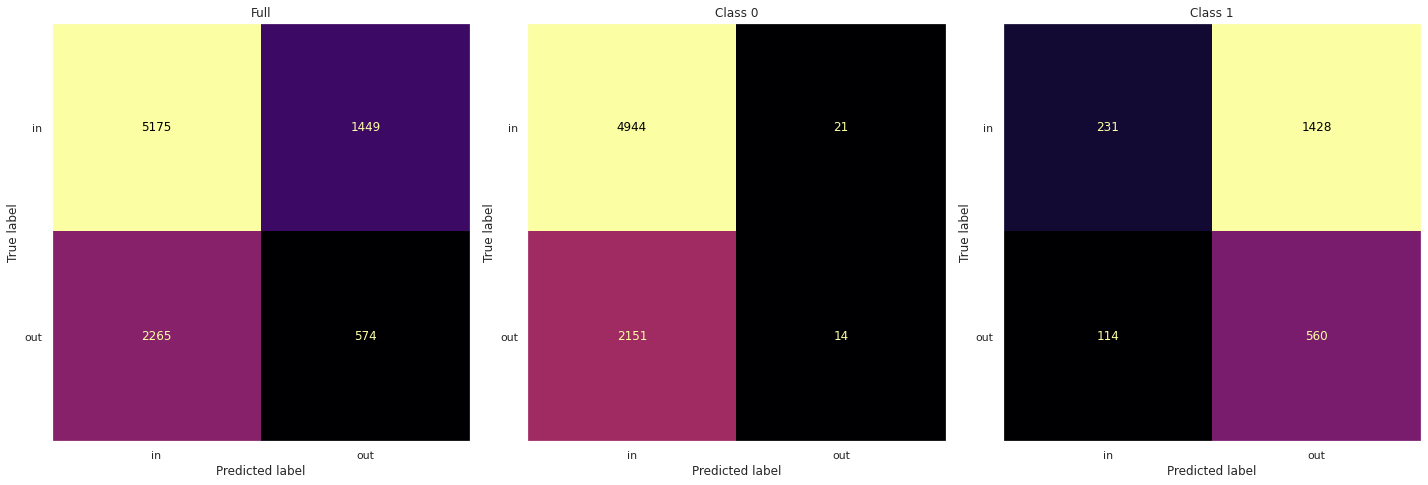

In [5]:
PLAIN_BASE_PATH = Path("../../statistical_no3std/diva/experiment_output/")
statistical_plain_0 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_plain_1 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_ens_0 = SoftVotingClassifier(statistical_plain_0)
statistical_ens_1 = SoftVotingClassifier(statistical_plain_1)

evaluate_attack(statistical_ens_0, statistical_ens_1, BB, BB_DATA)

## 3std

report full
              precision    recall  f1-score   support

          in       0.70      0.78      0.74      6624
         out       0.28      0.20      0.24      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.49      0.49      9463
weighted avg       0.57      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4965
         out       0.34      0.01      0.02      2165

    accuracy                           0.69      7130
   macro avg       0.52      0.50      0.42      7130
weighted avg       0.59      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.68      0.16      0.26      1659
         out       0.28      0.82      0.42       674

    accuracy                           0.35      2333
   macro avg       0.48      0.49      0.34      2333
weighted avg       0.57      0.35      0.30 

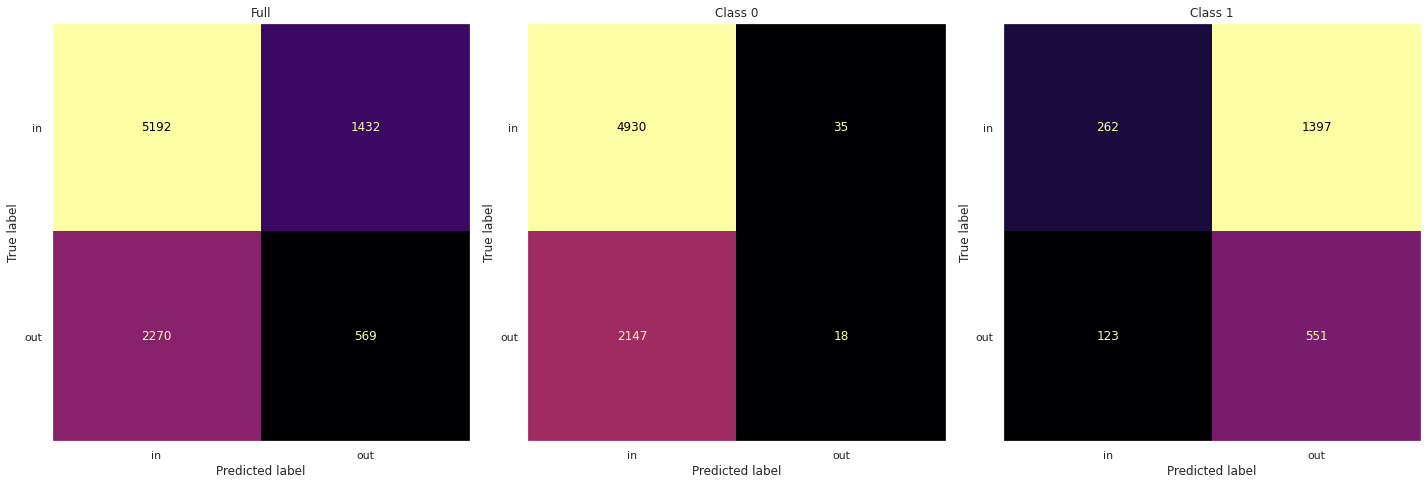

In [6]:
STD_DEV_BASE_PATH = Path("../../statistical/diva/experiment_output/")
statistical_std_dev_0 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_1 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_0 = SoftVotingClassifier(statistical_std_dev_0)
statistical_std_dev_1 = SoftVotingClassifier(statistical_std_dev_1)

evaluate_attack(statistical_std_dev_0, statistical_std_dev_1, BB, BB_DATA)

# 5MostSure Voting

## Plain

report full
              precision    recall  f1-score   support

          in       0.70      0.77      0.73      6624
         out       0.29      0.21      0.24      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.49      0.49      9463
weighted avg       0.57      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4965
         out       0.40      0.02      0.03      2165

    accuracy                           0.69      7130
   macro avg       0.55      0.50      0.42      7130
weighted avg       0.61      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.68      0.13      0.22      1659
         out       0.28      0.85      0.42       674

    accuracy                           0.34      2333
   macro avg       0.48      0.49      0.32      2333
weighted avg       0.56      0.34      0.28 

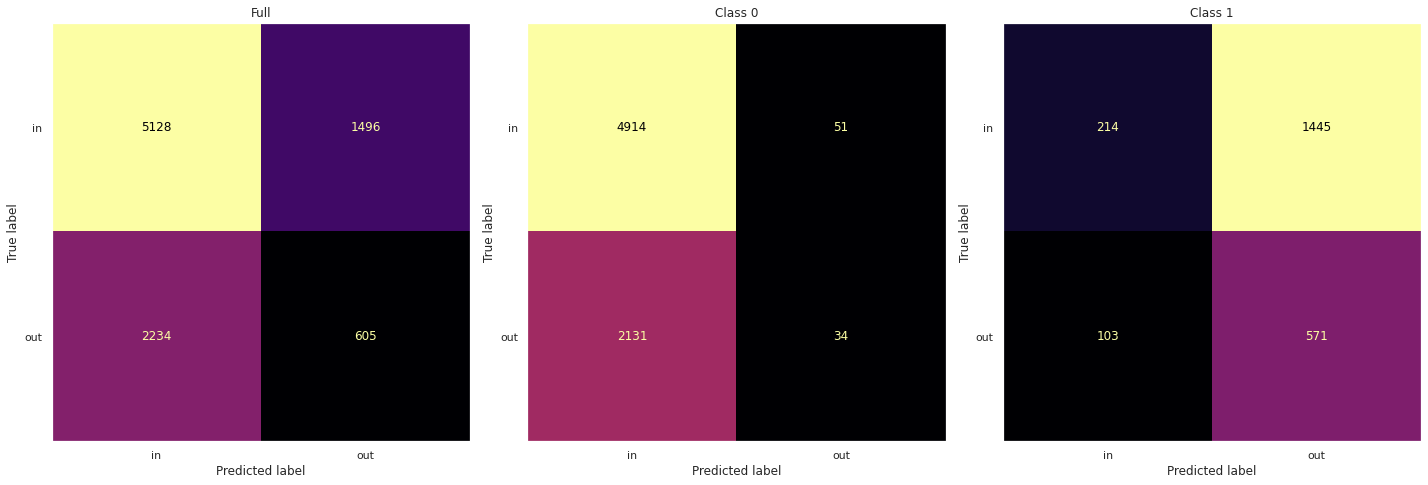

In [7]:
PLAIN_BASE_PATH = Path("../../statistical_no3std/diva/experiment_output/")
statistical_plain_0 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_plain_1 = [load_pickle_bz2(PLAIN_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_ens_0 = KMostSureVotingClassifier(statistical_plain_0)
statistical_ens_1 = KMostSureVotingClassifier(statistical_plain_1)

evaluate_attack(statistical_ens_0, statistical_ens_1, BB, BB_DATA)

## 3std

report full
              precision    recall  f1-score   support

          in       0.70      0.78      0.74      6624
         out       0.28      0.20      0.24      2839

    accuracy                           0.61      9463
   macro avg       0.49      0.49      0.49      9463
weighted avg       0.57      0.61      0.59      9463


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82      4965
         out       0.39      0.01      0.02      2165

    accuracy                           0.69      7130
   macro avg       0.54      0.50      0.42      7130
weighted avg       0.60      0.69      0.58      7130


Class 1
              precision    recall  f1-score   support

          in       0.67      0.15      0.24      1659
         out       0.28      0.82      0.42       674

    accuracy                           0.34      2333
   macro avg       0.47      0.48      0.33      2333
weighted avg       0.56      0.34      0.29 

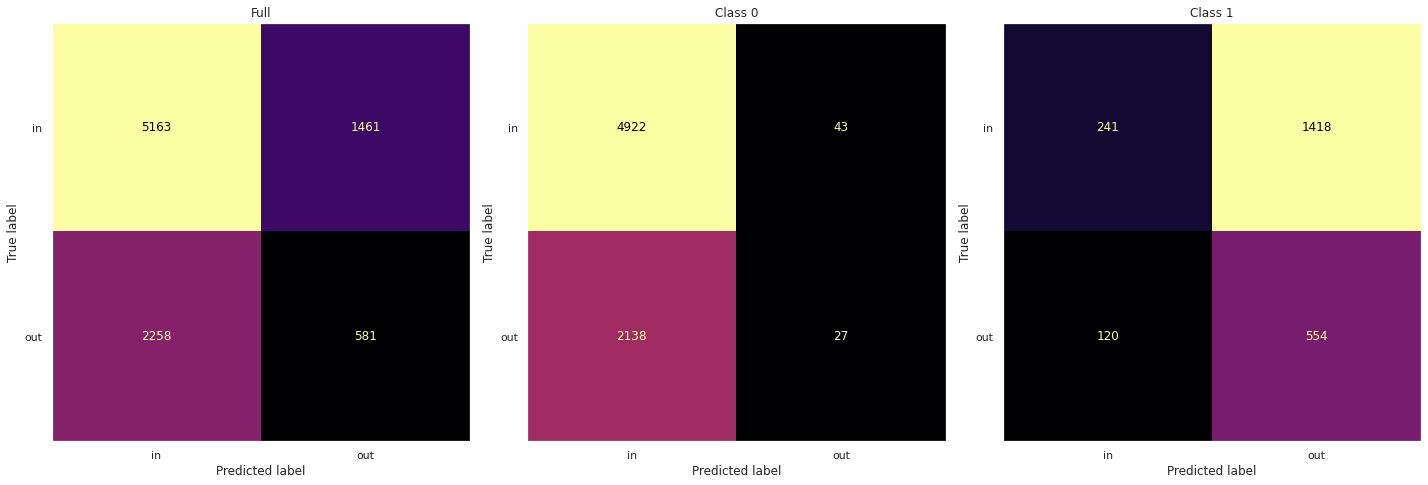

In [8]:
STD_DEV_BASE_PATH = Path("../../statistical/diva/experiment_output/")
statistical_std_dev_0 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "0" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_1 = [load_pickle_bz2(STD_DEV_BASE_PATH / f"{i}" / "attack" / "1" / "model.pkl.bz2" ) for i in range(n_datasets)]
statistical_std_dev_0 = KMostSureVotingClassifier(statistical_std_dev_0)
statistical_std_dev_1 = KMostSureVotingClassifier(statistical_std_dev_1)

evaluate_attack(statistical_std_dev_0, statistical_std_dev_1, BB, BB_DATA)